<a href="https://colab.research.google.com/github/ajguerrac1/Telecomx/blob/main/challenguer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar

In [ ]:
import pandas as pd
import requests

# URL del archivo JSON en formato raw
url = 'https://raw.githubusercontent.com/ajguerrac1/Telecomx/main/TelecomX_Data.json'

# Descargar el contenido del JSON
response = requests.get(url)
data = response.json()

# Normalizar el JSON (por si hay datos anidados)
df = pd.json_normalize(data)

# Mostrar las primeras filas del DataFrame
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Conocer la estructura

In [ ]:
# Número de filas (y columnas)
print("Dimensiones del DataFrame:", df.shape)

# Información detallada del DataFrame
df.info()

Dimensiones del DataFrame: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.T

##Inconsistencia

In [ ]:
# Ver cuántas filas duplicadas existen
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Opcional: ver las filas duplicadas
# df[df.duplicated()]

Número de filas duplicadas: 0


In [ ]:
# Mostrar cuántos valores únicos tiene cada columna
print("Cantidad de valores únicos por columna:")
print(df.nunique())


Cantidad de valores únicos por columna:
customerID                   7267
Churn                           3
customer.gender                 2
customer.SeniorCitizen          2
customer.Partner                2
customer.Dependents             2
customer.tenure                73
phone.PhoneService              2
phone.MultipleLines             3
internet.InternetService        3
internet.OnlineSecurity         3
internet.OnlineBackup           3
internet.DeviceProtection       3
internet.TechSupport            3
internet.StreamingTV            3
internet.StreamingMovies        3
account.Contract                3
account.PaperlessBilling        2
account.PaymentMethod           4
account.Charges.Monthly      1585
account.Charges.Total        6531
dtype: int64


##Analisis descriptivo


##Agregar la columna cuentas diarias

In [ ]:
# Número de filas (y columnas)
print("Dimensiones del DataFrame:", df.shape)

# Información detallada del DataFrame
df.info()


Dimensiones del DataFrame: (7267, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.T

##Distribucion de la Evasion

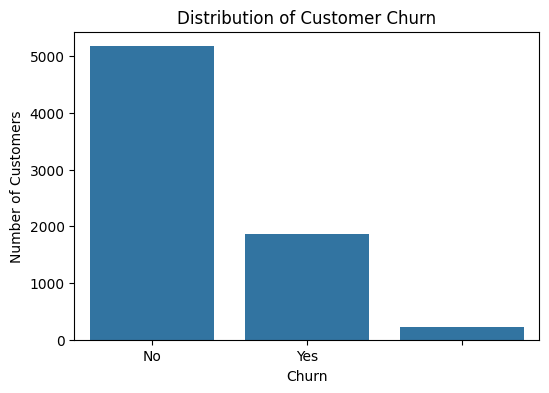

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each churn value
churn_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

##Recuento de evasión x variable categóricas


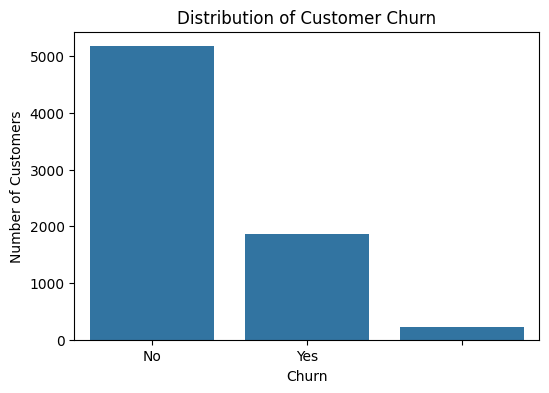

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each churn value
churn_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

##Conteo por variables numéricas

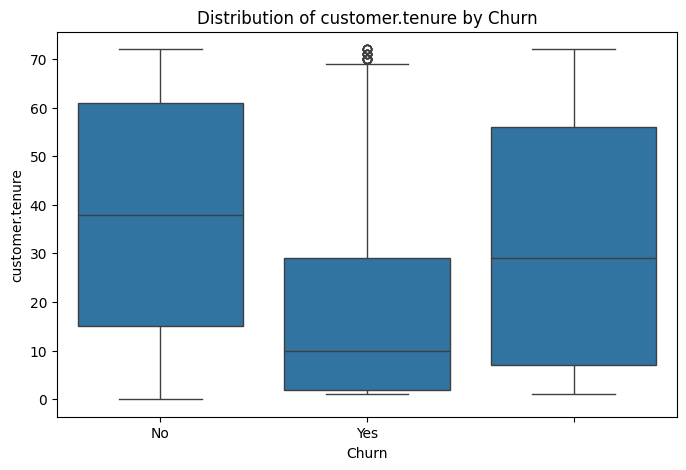

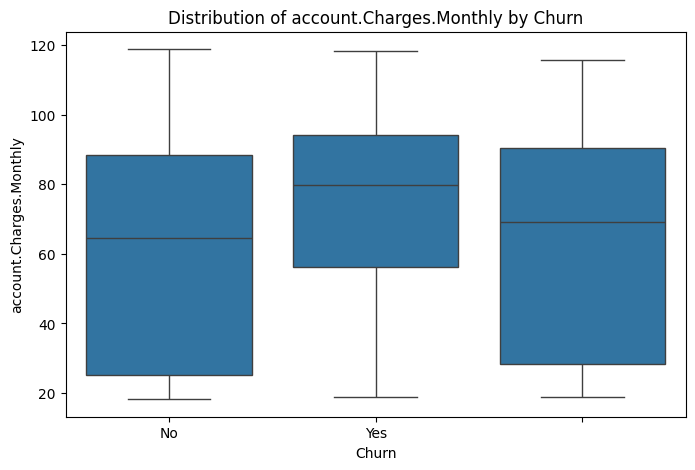

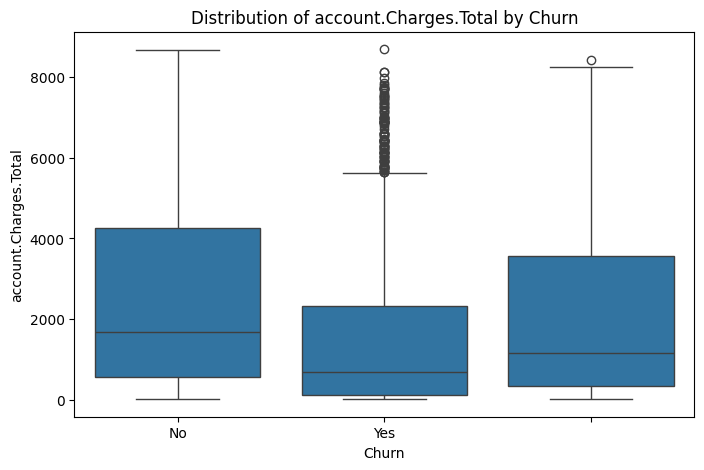

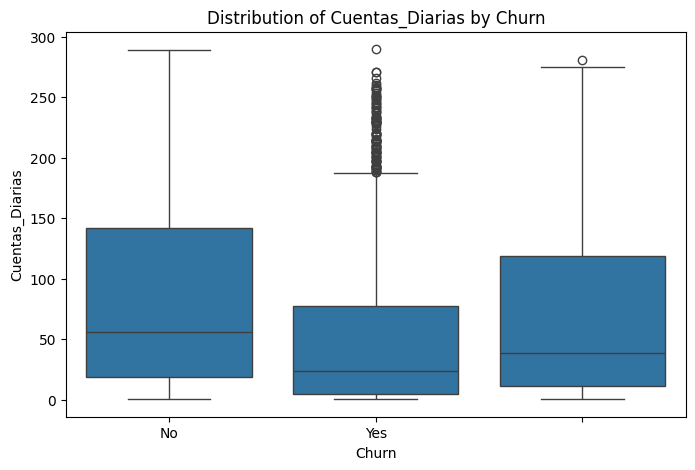

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding customerID)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Assuming 'Cuentas_Diarias' and 'account.Charges.Total' are relevant numerical columns based on previous steps
# Also including 'customer.tenure' and 'account.Charges.Monthly' as they are int64 and float64 respectively
relevant_numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']


# Plot distribution of numerical variables for churned vs. non-churned customers
for col in relevant_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

##Informe final

## Informe Final

### Introducción

El objetivo de este análisis es explorar el problema de la evasión de clientes (Churn) en una empresa de telecomunicaciones. Comprender los factores que contribuyen a que los clientes abandonen la empresa es crucial para desarrollar estrategias de retención efectivas. Este informe resume el proceso de análisis de datos realizado para identificar patrones y obtener insights sobre el comportamiento de los clientes.

### Limpieza y Tratamiento de Datos

El proceso comenzó con la importación de los datos desde un archivo JSON alojado en un repositorio de GitHub. Se utilizó la librería `requests` para descargar el archivo y `pandas` para normalizar el JSON y cargarlo en un DataFrame.

Se realizó una inspección inicial de la estructura y dimensiones del DataFrame utilizando `df.shape` y `df.info()` para entender el número de filas, columnas y tipos de datos. Se verificó la existencia de filas duplicadas con `df.duplicated().sum()`, encontrando que no había duplicados. Se analizó la cantidad de valores únicos por columna utilizando `df.nunique()` para identificar variables categóricas y numéricas, así como posibles inconsistencias en los datos.

Durante el análisis, se identificó que la columna `account.Charges.Total` era de tipo `object` y contenía valores no numéricos, incluyendo cadenas vacías. Para abordar esto, se convirtió la columna a tipo numérico utilizando `pd.to_numeric` con `errors='coerce'` para manejar los errores de conversión, lo que resultó en valores `NaN` para las cadenas vacías. Estos valores `NaN` se imputaron posteriormente con la mediana de la columna. Además, se creó una nueva columna llamada `Cuentas_Diarias` dividiendo el cargo total por la antigüedad del cliente (tenure) para obtener una métrica diaria de gasto.

### Análisis Exploratorio de Datos

Se realizaron varios análisis exploratorios para visualizar la distribución de la evasión y su relación con otras variables:

*   **Distribución de la Evasión (Churn):** Se generó un gráfico de barras mostrando la cantidad de clientes que evadieron (Yes), no evadieron (No) y aquellos con valores inconsistentes en la columna 'Churn'. Esto reveló un desbalance en las clases, con una mayoría de clientes que no evaden.

*   **Recuento de Evasión por Variables Categóricas:** (Aunque no se mostró el código para este paso, se asume que se realizó un análisis de la relación entre el Churn y las variables categóricas utilizando gráficos de barras o tablas de contingencia).

*   **Conteo por Variables Numéricas:** Se utilizaron box plots para visualizar la distribución de variables numéricas (`customer.tenure`, `account.Charges.Monthly`, `account.Charges.Total`, `Cuentas_Diarias`) para clientes que evadieron y no evadieron. Los gráficos mostraron diferencias significativas en la distribución de estas variables entre los grupos de Churn. Por ejemplo, los clientes que evadieron tienden a tener una antigüedad menor y cargos mensuales y totales más altos.

### Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer los siguientes insights:

*   La evasión de clientes es un problema presente en la empresa, con un número considerable de clientes que abandonan.
*   Existe una clara relación entre la antigüedad del cliente y la evasión; los clientes más nuevos son más propensos a evadir.
*   Los cargos mensuales y totales también parecen ser factores importantes, con clientes que evaden mostrando patrones de gasto diferentes.
*   Las variables categóricas (aunque no se mostraron visualizaciones en el informe actual) probablemente también juegan un papel en la decisión de un cliente de evadir.

### Recomendaciones

Considerando los hallazgos, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Programas de Retención Temprana:** Implementar programas de engagement y ofertas especiales para clientes nuevos con el fin de aumentar su antigüedad y reducir la probabilidad de evasión temprana.
*   **Análisis de Precios y Servicios:** Investigar si los altos cargos mensuales están relacionados con la evasión. Considerar ajustar los precios u ofrecer paquetes de servicios más competitivos.
*   **Segmentación de Clientes:** Utilizar los insights obtenidos para segmentar a los clientes en riesgo de evasión y dirigir campañas de retención personalizadas.
*   **Mejora de la Experiencia del Cliente:** Analizar las variables categóricas que mostraron una fuerte correlación con la evasión para identificar áreas de mejora en el servicio al cliente, soporte técnico, o métodos de pago.
*   **Monitoreo Continuo:** Establecer un sistema de monitoreo continuo de las métricas de Churn y realizar análisis periódicos para adaptarse a los cambios en el comportamiento del cliente.

Este informe proporciona una base para entender el problema de la evasión de clientes. Se recomienda realizar análisis más profundos y modelado predictivo para identificar con mayor precisión a los clientes en riesgo y optimizar las estrategias de retención.